1. จงอธิบายความหมายของตัวแปรเหล่านี้

a) Amplitude - การกระจัดสูงสุดจากจุดสมดุล

b) Phase Constant - มุมเฟสเริ่มต้น 

c) Angular Frequency - อัตราเร็วเชิงมุม = 2πT

2. จงตอบคำถาม: ถ้าการสั่นมีแรงต้านจากความหนืดเกิดเป็น Damped Oscillation สมการจากรูป 15-2 จะมีการเปลี่ยนแปลงอย่างไร จงอธิบายตัวแปรที่เพิ่มเข้ามา (1 คะแนน)

แรงหนืดทำให้เกิดการลดทอน amplitude หรือ attenuation 
มีตัวแปร ทำให้กราฟเปลี่ยนรูปแบบเป็น exponential decay 
ตัวแปรที่เพิ่มเข้ามาคือ 	
γ = สัมประสิทธิ์การลดทอน 

ได้สมการออกมาดังนี้ 𝑥(𝑡)=𝑥(0)𝐴𝑒−	γ𝑡sin(𝜔𝑡+𝜙)

3. จงใช้โปรแกรม Tracker บันทึกการเคลื่อนที่ของ a) ยอดตึกที่ไม่มี Tuned-mass damper, b) ยอดตึกที่มี Tuned-mass damper, และ c) ลูกตุ้ม Tuned-mass damper แล้วนำข้อมูลมาสร้างกราฟด้วย matplotlib (อาจดัดแปลงโค้ดตัวอย่างที่ให้ไป) (1 คะแนน)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
df1 = pd.read_csv("/content/774damped_nocontrol.csv", header=1)
df2 = pd.read_csv("/content/774damped_control.csv", header=1)
df3 = pd.read_csv("/content/774damped_damper.csv", header=1)

In [ ]:
t_all=[np.array(df1.t),np.array(df2.t),np.array(df3.t)]
x_all=[np.array(df1.x),np.array(df2.x),np.array(df3.x)]

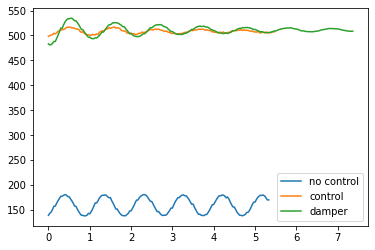

In [ ]:
plt.plot(t_all[0],x_all[0], label='no control')
plt.plot(t_all[1],x_all[1], label='control')
plt.plot(t_all[2],x_all[2], label='damper')
plt.legend()
plt.show()

4. จากโค้ดตัวอย่าง จงอธิบายความหมายของตัวแปร gamma ที่อยู่ในฟังก์ชั่น f ในโค้ดตัวอย่าง (1 คะแนน)

gamma = สัมประสิทธิ์การลดทอน

ถ้ามีความหน่วงมาก amplitude จะลดเร็ว

ถ้ามีความหน่วงน้อย amplitude จะลดช้า

5. จากข้อ 3 จงใช้ curve_fit หาค่าตัวแปร period, gamma และ phase ของทั้ง 3 ระบบ (1 คะแนน)

a) ยอดตึกที่ไม่มี Tuned-mass damper

period = 9.53467762e-01

gamma = 9.16884566e-03

phase = -1.07421001e+00 

b) ยอดตึกที่มี Tuned-mass damper

period = 1.04985759e+00

gamma = 2.42169117e-01

phase = -4.66679089e+00 

c) ลูกตุ้ม Tuned-mass damper

period = 1.05370095e+00

gamma = 3.52053604e-01

phase = -8.07728555e+00

In [ ]:
''' Fitting to a function '''

def f(t,A,period,y0,phase,gamma):
  return y0 + A*np.exp(-gamma*t)*np.sin(2*np.pi*t/period + phase)

p1, p1cov = curve_fit( f, t_all[0], x_all[0], p0=[2,1,-49,0,1] ) # p0 = initial data
print(p1)
p2, p2cov = curve_fit( f,t_all[1], x_all[1], p0=[2,1,-49,0,1] )
print(p2)
p3, p3cov = curve_fit( f,t_all[2], x_all[2], p0=[2,1,-49,0,1] )
print(p3)

[ 2.13415817e+01  9.53467762e-01  1.58307549e+02 -1.07421001e+00
  9.16884566e-03]
[-9.48680795e+00  1.04985759e+00  5.08256662e+02 -4.66679089e+00
  2.42169117e-01]
[ 2.82109903e+01  1.05370095e+00  5.10810612e+02 -8.07728555e+00
  3.52053604e-01]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.


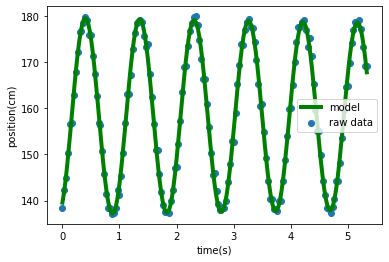

In [ ]:
# compare fitted model to raw data
t_fit1 = np.linspace(0.0, t_all[0][-1], 201)  # domain
x_fit1 = f(t_fit1,p1[0],p1[1],p1[2],p1[3],p1[4]) # range

plt.xlabel( 'time(s)' )
plt.ylabel( 'position(cm)' )
plt.plot( t_fit1, x_fit1, 'g', linewidth=4, label='model' )
plt.scatter( t_all[0], x_all[0], label='raw data' )
plt.legend()
plt.show()

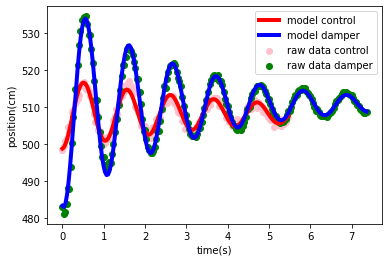

In [ ]:


# compare fitted model to raw data
t_fit2 = np.linspace(0.0, t_all[1][-1], 201)  # domain
x_fit2 = f(t_fit2,p2[0],p2[1],p2[2],p2[3],p2[4]) # range
t_fit3 = np.linspace(0.0, t_all[2][-1], 201)  # domain
x_fit3 = f(t_fit3,p3[0],p3[1],p3[2],p3[3],p3[4]) # range
plt.plot( t_fit2, x_fit2, 'r', linewidth=4, label='model control' )
plt.scatter( t_all[1],x_all[1],color= '#ffc0cb',label='raw data control' )
plt.plot( t_fit3, x_fit3, 'b', linewidth=4, label='model damper' )
plt.scatter( t_all[2], x_all[2],color='g', label='raw data damper' )
plt.xlabel( 'time(s)' )
plt.ylabel( 'position(cm)' )


plt.legend()
plt.show()


                  period     gamma     phase
without damper  0.953468  0.009169 -1.074210
with damper     1.049858  0.242169 -4.666791
pendulum        1.053701  0.352054 -8.077286


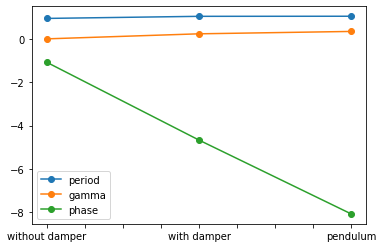

In [ ]:
var = [[9.53467762e-01,9.16884566e-03,-1.07421001e+00], # w/o
       [1.04985759e+00,2.42169117e-01,-4.66679089e+00], # w/
       [1.05370095e+00,3.52053604e-01,-8.07728555e+00]] # Pendulum
df=pd.DataFrame(var,columns=['period','gamma','phase'],index=['without damper','with damper','pendulum'])
print(df)

df.plot(marker='o')
plt.show()

6. จงเขียนอภิปรายว่า period, gamma และ phase ของทั้ง 3 ระบบ มีความแตกต่างกันหรือไม่ อย่างไร และความแตกต่างดังกล่าวเกิดขึ้นจากอะไร ให้ตอบแยกมาเป็นประเด็น

**Period/คาบ**

- เนื่องจากคาบเป็นระยะเวลาที่ขึ้นกับการเคลื่อนที่ ทั้ง3ระบบได้ถูกรบกวนจากที่เดียวกันคือคนที่ผลัก ทำให้แรงส่งที่ได้รับใกล้เคียงกัน แต่เพราะแรงส่งได้รับมาจากคน ทั้ง2ตึกเลยได้รับแรงที่ต่างกันและ ค่าperiodของทั้ง3ระบบจึงต่างกันเพียงเล็กน้อย

- แรงส่งที่ยอดตึกที่มี Tuned-mass damper และลูกตุ้ม Tuned-mass damperมาจากที่เดียวกัน/มือข้างเดียวกัน ทำให้ค่าperiodใกล้กันมาก แต่เพราะเป็นการสั่นแบบdamped oscillation ความหน่วง/การลดทอนamplitude จึงส่งผลให้periodมีค่ามากกว่าแบบ simple harmonic motion

**Gamma**

- ยอดตึกที่ไม่มี Tuned-mass damper มีลักษณะการสั่นใกล้เคียงกับรูปแบบ simple harmonic motion ค่า gamma ที่ใกล้เคียง0มากจึงส่งผลให้amplitudeลดลงอย่างช้าๆ

- ตึกที่มี Tuned-mass damper มีแรงหนืดเพิ่มเข้ามาในระบบ(ต่างจากตึกที่ไม่มี) แรงหนืดนั้นส่งผลให้เกิดการลดทอน amplitude ในรูปแบบ exponential decay ค่า gamma ของยอดตึกจึงมีค่ามากกว่าตึกที่ไม่มี และลูกตุ้มมีค่า gamma มากที่สุดทำให้มีความหน่วงมาก

**Phase**

- ขึ้นอยู่กับตำแหน่งเริ่มต้นของการ oscillation หรือเมื่อเวลา t=0 การส่งแรงจากคนและแรงที่ได้รับต้องมากพอที่จะรบกวนระบบได้ ทำให้ใช้เวลาต่างกันเพียงเล็กน้อย ในการเริ่มต้นการ oscillation
ค่าphaseของทั้ง3ระบบจึงแตกต่างกันเพียงเล็กน้อย

- Phase ที่ต่างกันของยอดตึกที่มี Tuned-mass damper และลูกตุ้ม Tuned-mass damper ทำให้ center of mass ของทั้งระบบเปลี่ยนและมีรูปแบบการสั่นเป็น damped oscillation